In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from keras._tf_keras.keras.preprocessing.text import Tokenizer
from keras._tf_keras.keras.layers import Embedding , LSTM ,Dense,Dropout,Bidirectional,Flatten
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [2]:
real = pd.read_csv("islenmis_dogru_haberler.csv")
fake = pd.read_csv("islenmis_sahte_haberler.csv")

# Etiket ekleme
real['label'] = 1
fake['label'] = 0

# Veri setlerini birleştirme
df = pd.concat([real, fake], ignore_index=True)
X = df["Haber"]
y = df['label']

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# TF-IDF vektörlerine dönüştürme
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [3]:
# LSTM modeli oluşturma
max_features = 10000  # Kelime dağarcığının büyüklüğü
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_lstm = tokenizer.texts_to_sequences(X_train)
X_test_lstm = tokenizer.texts_to_sequences(X_test)

maxlen = 100  # Metin uzunluğunu sabitleme
X_train_lstm = pad_sequences(X_train_lstm, padding='post', maxlen=maxlen)
X_test_lstm = pad_sequences(X_test_lstm, padding='post', maxlen=maxlen)

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train_lstm, y_train, batch_size=32, epochs=5, validation_data=(X_test_lstm, y_test))

Epoch 1/5


c:\Users\kaannn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7193 - loss: 0.5672 - val_accuracy: 0.9155 - val_loss: 0.2641
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9344 - loss: 0.2345 - val_accuracy: 0.9191 - val_loss: 0.2345
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9621 - loss: 0.1363 - val_accuracy: 0.9407 - val_loss: 0.1787
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9614 - loss: 0.1453 - val_accuracy: 0.9128 - val_loss: 0.2788
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9652 - loss: 0.1089 - val_accuracy: 0.9371 - val_loss: 0.2502


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test Verisi doğruluk değeri: 93.7


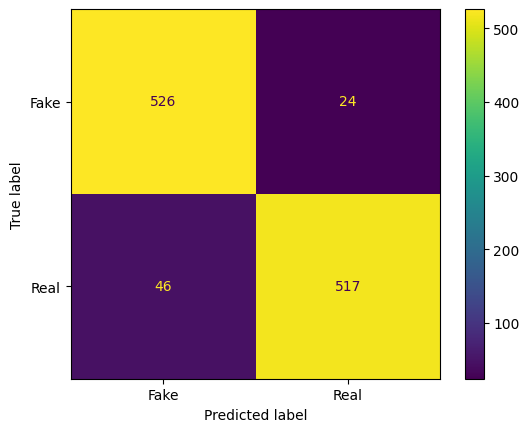

In [5]:
# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test_lstm)
y_pred = (y_pred > 0.5).astype(int)

# Doğruluk değerini hesaplama ve yazdırma
accuracy = accuracy_score(y_test, y_pred)
print('Test Verisi doğruluk değeri: %.1f'%(accuracy*100))

# Confusion matrix oluşturma ve görselleştirme
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot()
plt.show()